## Extracting Stock Data Using Python

<p> First let's install and import our dependencies.
 </br>We will be using yfinance and pandas.
</br> yfinance is an open-source tool that uses Yahoo's publicly available APIs.
    </p>

In [5]:
pip install yfinance==0.2.4 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.28
    Uninstalling yfinance-0.2.28:
      Successfully uninstalled yfinance-0.2.28
Note: you may need to restart the kernel to use updated packages.


In [12]:
import yfinance as yf
import pandas as pd

The <code>Ticker</code> module allows us to create an object which will allow us to extract data.

In [24]:
apple = yf.Ticker("AAPL")

### Stock info

In [38]:
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)


We can get the country using the key <code>country</code>

In [19]:
apple_info['country']

'United States'

### Extracting Share Price

Using the <code>history</code> method we can get the share price over a specified period of time

In [21]:
apple_share_price_data = apple.history(period="max")

In [22]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099450,0.099882,0.099450,0.099450,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094694,0.094694,0.094261,0.094261,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087775,0.087775,0.087343,0.087343,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089504,0.089937,0.089504,0.089504,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092099,0.092532,0.092099,0.092099,73449600,0.0,0.0


Here we can see that the data is indexed by date, let's change that to a numerical index.
- inplace parameter allows the change to take place to the DataFrame itself

In [28]:
apple_share_price_data.reset_index(inplace=True)

Now let's plot the <code>Open</code> price againts the <code>Date.</code>

<Axes: xlabel='Date'>

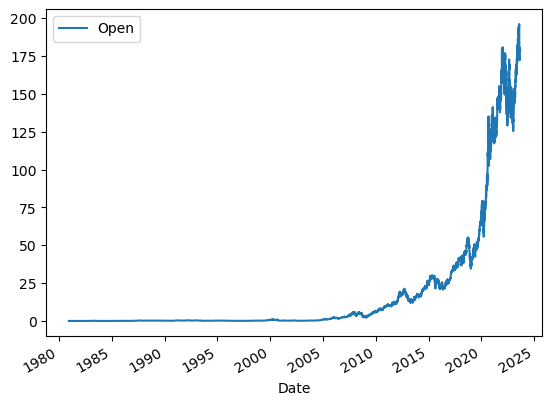

In [29]:
apple_share_price_data.plot(x="Date",y="Open")

### Extracting Dividends

<Axes: xlabel='Date'>

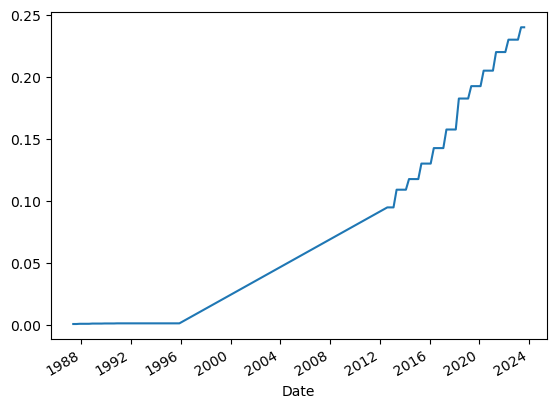

In [34]:
apple.dividends.plot()

### Now let's try this out with AMD

In [35]:
amd = yf.Ticker("AMD")

In [37]:
import json
with open('amd.json') as json_file:
    amd_info = json.load(json_file)


In [39]:
amd_info['country']

'United States'

In [40]:
amd_info['sector']

'Technology'

In [47]:
amd_share_price_data = amd.history(period='max')
amd_share_price_data.reset_index(inplace=True)
amd_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-03-17 00:00:00-05:00,0.0,3.302083,3.125000,3.145833,219600,0.0,0.0
1,1980-03-18 00:00:00-05:00,0.0,3.125000,2.937500,3.031250,727200,0.0,0.0
2,1980-03-19 00:00:00-05:00,0.0,3.083333,3.020833,3.041667,295200,0.0,0.0
3,1980-03-20 00:00:00-05:00,0.0,3.062500,3.010417,3.010417,159600,0.0,0.0
4,1980-03-21 00:00:00-05:00,0.0,3.020833,2.906250,2.916667,130800,0.0,0.0


Let's find the volume for AMD's very first day of trading

In [48]:
amd_share_price_data.loc[0]['Volume']

219600